<div style="text-align: center">
<b><font size=6>Txy Calculation Example
    </font></b>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Create a $T$-$x$-$y$ diagram for propane/benzene at the bubble point

## Bubble point calculation based on Rachford-Rice

At the bubble point, the Rachford-Rice equation reduces to:
$$
    \sum_{i=1}^C z_i K_i = 1.
$$
In residual form, this can be written as
$$
    r(T) = 1 - \sum_{i=1}^C z_i K_i
$$

Remember that $K_i = f(T,P)$. For a $T$-$x$-$y$ diagram, $P$ is set, so we need to find the value of $T$ for which the above equations are satisfied. That means we'll need to set up an optimization problem to minimize the above equation with respect to $T$. 

Working backwards, we can see that we'll need a way to get $K_i$. So, we'll need a function for Raoult's Law

$$
    K_i = \frac{P_i^{sat}}{P}
$$

Because $P_i^{sat}$ depends on temperature, we'll also need a function for Antoine's equation:

$$
    P_i^{sat} = 10^{(A - B / ( T + C))}
$$

In [2]:
from get_antoine_coefficient import get_antoine_coefficient
from antoine import antoine
from raoult_law_kvalue import raoult_law_kvalue

In [6]:
acetone = get_antoine_coefficient('acetone',350)
acetone

[4.42448, 1312.253, -32.445, 259.16, 507.6]

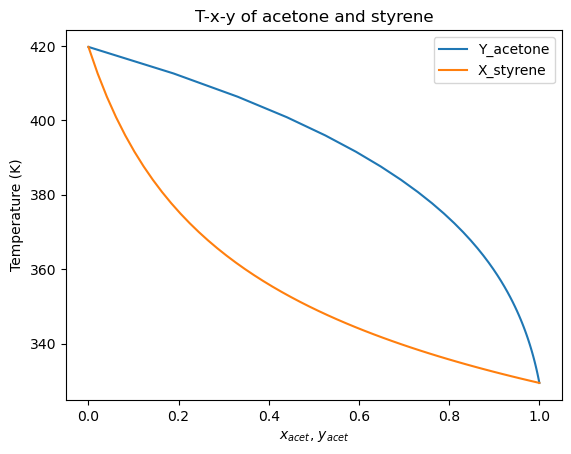

In [5]:
P = 1.01325  # Pressure in bar
Tguess = 350 # K

acetone = get_antoine_coefficient('acetone',Tguess) # changed propane to acetone
styrene = get_antoine_coefficient('styrene',Tguess) # changed toluene to styrene

antoineCoefs = np.array( [acetone[0:3], styrene[0:3]] )

T_soln = []
x_acet = np.linspace(0,1)
y_acet = []
for z_acet in x_acet:
    z = [z_acet,1-z_acet]
    def resfun(T):
        return 1-np.sum(raoult_law_kvalue(T,P,antoineCoefs)*z)

    T = fsolve(resfun,Tguess)
    Tguess = T
    T_soln.append(T)
    K = raoult_law_kvalue(T,P,antoineCoefs)
    y = K*z
    y_acet.append(y[0])

plt.plot(y_acet,T_soln,label='Y_acetone') #added " label='Y_acetone' "
plt.plot(x_acet,T_soln,label='X_styrene') #added " label=X_styrene"
plt.xlabel('$x_{acet}$, $y_{acet}$')
plt.ylabel('Temperature (K)')
plt.title('T-x-y of acetone and styrene')
plt.legend(loc="upper right") #added legend